In [449]:
#Install Packages

#pip install openpyxl
#pip install pandas
#pip install matplotlib
#pip install scipy
#pip install simplejson

In [450]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import datetime
import json
import pickle
import matplotlib.pyplot as plt

In [451]:
# Load variables from the DataAnalysis file

with open('DataAnalysisVariables.pkl', 'rb') as f:
    data = pickle.load(f)

In [452]:
# Load variables from the Global_Variables file

with open('Global_Variables.pkl', 'rb') as f:
    Global_Variables = pickle.load(f)

In [453]:
#Assumptions from CHE Report

#BTC Mining
#Basis_MW = data['Basis_MW'] #MW
#Hardware_Eff = data['Hardware_Eff'] #Percentage
#W_from_Renewables = data['W_from_Renewables'] #GW
#P_from_Renewables = data['P_from_Renewables'] #GW
#P_from_Solar = data['P_from_Solar']
#Solar_Surplus = data['Solar_Surplus'] #Percentage of excess energy produced by Solar Energy
#Solar_Plant_W = data['Solar_Plant_W'] #GW

#Solar Plant
#PV_Capacity = data['PV_Capacity'] #MW Maximum capacity
Capital_Cost_PV = Global_Variables['Capital_Cost_PV'] #$/MW
#PV_Plant_Cost = data['PV_Plant_Cost'] #$

#Calculations based on Assumptions
#W_from_Solar = data['W_from_Solar']
#Global_W = data['Global_W']

#Date of data extraction from Blockchain.com
last_date = Global_Variables['last_date']

In [454]:
#Calculated in Data Analysis file
NumberofRigsPerModel = data['NumberofRigsPerModel']

In [455]:
#Data used as basis
Crypto_Data = Global_Variables['Crypto_Data']
ASIC_df = Crypto_Data

#Bitcoin Data
hashrate_BTC = Global_Variables['hashrate_BTC']
revenue_BTC = Global_Variables['revenue_BTC']
marketprice_BTC = Global_Variables['marketprice_BTC']

#JSON file paths
file_paths = [hashrate_BTC,revenue_BTC]

In [456]:
#Considering that 
ASIC_df['NumberOfRigs'] = ASIC_df['Model'].map(NumberofRigsPerModel)

ASIC_df['Total Hashrate (Th/s)'] = ASIC_df['Hashrate (Th/s)']*ASIC_df['NumberOfRigs']

#Once off
ASIC_df['CapitalCost (000 $)'] = ASIC_df['NumberOfRigs']*ASIC_df['Price ($)']/1000

ASIC_df.head()

,Model,Release,Hashrate (Th/s),Power (W),Algorithm,Income ($/day),Electricity Cost ($/day),With Electricity,Without Electricity,Efficiency (j/Gh),Price ($),Noise db,Cooling,Seller,Days to Breakeven,Rig Type,NumberOfRigs,Total Hashrate (Th/s),CapitalCost (000 $)
0,MicroBT WhatsMiner M63S,01-Nov-23,390.0,7215.0,SHA-256,20.29,-20.78,-0.49,20.29,0.019,12449.0,50.0,hydrocooling,AsicMarketPlace,613.553475,ASIC,29568.0,11531520.0,368092.032
1,Bitmain Antminer S21 Hyd (335Th),01-Feb-24,335.0,5360.0,SHA-256,17.43,-15.44,1.99,17.43,0.016,5889.0,50.0,hydrocooling,AsicMarketPlace,337.865749,ASIC,39801.0,13333335.0,234388.089
2,MicroBT WhatsMiner M63,01-Nov-23,334.0,6646.0,SHA-256,17.38,-19.14,-1.76,17.38,0.020,6879.0,50.0,hydrocooling,AsicMarketPlace,395.799770,ASIC,32100.0,10721400.0,220815.900
3,MicroBT WhatsMiner M66S,01-Nov-23,298.0,5513.0,SHA-256,15.51,-15.88,-0.37,15.51,0.019,9649.0,50.0,hydrocooling,AsicMarketPlace,622.114765,ASIC,38696.0,11531408.0,373377.704
4,Bitmain Antminer S21 Pro (234Th),01-Jul-24,234.0,3531.0,SHA-256,12.18,-10.17,2.01,12.18,0.015,5029.0,75.0,2 fans,AsicMarketPlace,412.889984,ASIC,60417.0,14137578.0,303837.093


In [457]:
ASIC_df.columns

Index(['Model', 'Release', 'Hashrate (Th/s)', 'Power (W)', 'Algorithm',
       'Income ($/day)', 'Electricity Cost ($/day)', 'With Electricity',
       'Without Electricity', 'Efficiency (j/Gh)', 'Price ($)', 'Noise db',
       'Cooling', 'Seller', 'Days to Breakeven', 'Rig Type', 'NumberOfRigs',
       'Total Hashrate (Th/s)', 'CapitalCost (000 $)'],
      dtype='object')

In [458]:
temp_ASIC_df = ASIC_df.copy()

In [459]:
old_column_names = ['Release', 'Hashrate (Th/s)', 'Power (W)', 'Algorithm',
       'Income ($/day)', 'Electricity Cost ($/day)',
       'With Electricity', 'Without Electricity',
       'Efficiency (j/Gh)', 'Price ($)', 'Noise db', 'Cooling', 'Seller',
       'Days to Breakeven', 'NumberOfRigs',
       'Total Hashrate (Th/s)', 'CapitalCost (000 $)']

new_column_names = ['Release', 'Hashrate(Th/s)','Power(W)','Algorithm',
        'Income($/day)','ElectricityCost($/day)',
        'WithElectricity','WithoutElectricity',
        'Efficiency(j/Gh)','Price($)','Noisedb','Cooling','Seller',
        'DaystoBreakeven','NumberOfRigs',
        'TotalHashrate(Th/s)','CapitalCost(000)']

In [460]:
temp_ASIC_df[new_column_names] = temp_ASIC_df[old_column_names]

dicts = {}

for col in new_column_names:
    dict_name = f"dict_{col}"
    dicts[dict_name] = temp_ASIC_df.set_index('Model')[col].to_dict()

for name, dictionary in dicts.items():
    print(f"{name} -> {dictionary}")


dict_Release -> {'MicroBT WhatsMiner M63S': '01-Nov-23', 'Bitmain Antminer S21 Hyd (335Th)': '01-Feb-24', 'MicroBT WhatsMiner M63': '01-Nov-23', 'MicroBT WhatsMiner M66S': '01-Nov-23', 'Bitmain Antminer S21 Pro (234Th)': '01-Jul-24', 'Bitmain Antminer S21 (200Th)': '01-Feb-24', 'Bitmain Antminer T21 (190Th)': '01-Feb-24', 'MicroBT WhatsMiner M60S': '01-Feb-24', 'Canaan Avalon A1566': '01-Oct-24', 'MicroBT WhatsMiner M60': '01-Feb-24', 'Bitmain Antminer S19j Pro (104Th)': '01-Jul-21', 'Bitmain Antminer S19 Pro (110Th)': '01-May-20', 'Core i7 950': '2009', 'Atom N450': '2009', 'ATI 4850': '2010', 'ATI 5770': '2010', 'The Single': '2011', 'Rig Box': '2011'}
dict_Hashrate(Th/s) -> {'MicroBT WhatsMiner M63S': 390.0, 'Bitmain Antminer S21 Hyd (335Th)': 335.0, 'MicroBT WhatsMiner M63': 334.0, 'MicroBT WhatsMiner M66S': 298.0, 'Bitmain Antminer S21 Pro (234Th)': 234.0, 'Bitmain Antminer S21 (200Th)': 200.0, 'Bitmain Antminer T21 (190Th)': 190.0, 'MicroBT WhatsMiner M60S': 186.0, 'Canaan Avalon

In [461]:
#Function to read JSON files
def read_and_print_json(file_path):

    with open(file_path, 'r') as file:
        json_data = json.load(file)

    print(json_data)
    
    return json_data

In [462]:
#Function to convert json data to Dataframe
def process_data(category_y,category_x,json_data):
    time_series_data = json_data[category_y]

    df = pd.DataFrame(time_series_data)
    df[category_x] = df['x']
    df[category_y] = df['y']
    return df

In [463]:
#Function to add column with dates to the data
def add_dates(df,last_date):

    num_rows = df.shape[0]
    dates = pd.date_range(end=last_date, periods=num_rows)
    df['Date'] = dates

    return df

In [464]:
#Function to plot graphs for data visualization
def plot_graph(df,y_data,title,y_label):
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True

    x = df['Date']
    y = df[y_data]

    plt.plot(x, y,label=y_data, color='red')

    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(y_label)
    plt.legend()
    plt.show()


{'metric1': 'miners-revenue', 'metric2': 'market-price', 'miners-revenue': [{'x': 1698451200000, 'y': 31018704.384994347}, {'x': 1698537600000, 'y': 31869663.034045357}, {'x': 1698624000000, 'y': 32053239.592004847}, {'x': 1698710400000, 'y': 32663988.681133866}, {'x': 1698796800000, 'y': 33441948.513665527}, {'x': 1698883200000, 'y': 33470161.096744664}, {'x': 1698969600000, 'y': 33484481.368150137}, {'x': 1699056000000, 'y': 32987416.154812064}, {'x': 1699142400000, 'y': 33831315.08251717}, {'x': 1699228800000, 'y': 34970491.281359695}, {'x': 1699315200000, 'y': 34304247.065032534}, {'x': 1699401600000, 'y': 34048475.964370735}, {'x': 1699488000000, 'y': 34650644.88509359}, {'x': 1699574400000, 'y': 35941397.8715662}, {'x': 1699660800000, 'y': 37521879.87848707}, {'x': 1699747200000, 'y': 37752398.46864532}, {'x': 1699833600000, 'y': 38600137.92737014}, {'x': 1699920000000, 'y': 38808396.61609398}, {'x': 1700006400000, 'y': 39203968.35652012}, {'x': 1700092800000, 'y': 39445757.50334

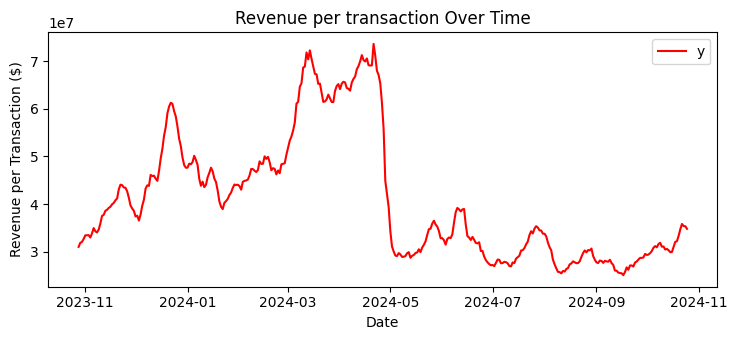

In [465]:
#Daily transaction_revenue to BTC miners across the globe
file_path = revenue_BTC
json_data = read_and_print_json(file_path)

category_y = 'miners-revenue'
category_x = 'Revenue (USD)'
df_revenue = process_data(category_y,category_x,json_data)

df_revenue = add_dates(df_revenue,last_date)

print(df_revenue.head())

y_data = 'y'
title = 'Revenue per transaction Over Time'
y_label = 'Revenue per Transaction ($)'
plot_graph(df_revenue,y_data,title,y_label)

{'metric1': 'hash-rate', 'metric2': 'market-price', 'hash-rate': [{'x': 1698451200000, 'y': 448143230.48629}, {'x': 1698537600000, 'y': 452477304.2820955}, {'x': 1698624000000, 'y': 445542786.2088067}, {'x': 1698710400000, 'y': 446432116.97122365}, {'x': 1698796800000, 'y': 460578041.84067196}, {'x': 1698883200000, 'y': 464261140.1474795}, {'x': 1698969600000, 'y': 463125882.7349779}, {'x': 1699056000000, 'y': 456708337.497233}, {'x': 1699142400000, 'y': 461884981.20968944}, {'x': 1699228800000, 'y': 474812083.2106728}, {'x': 1699315200000, 'y': 462212744.476483}, {'x': 1699401600000, 'y': 452453934.13244975}, {'x': 1699488000000, 'y': 452453934.13244975}, {'x': 1699574400000, 'y': 452010351.8440846}, {'x': 1699660800000, 'y': 459994833.0346573}, {'x': 1699747200000, 'y': 456446174.72773606}, {'x': 1699833600000, 'y': 456439922.31436163}, {'x': 1699920000000, 'y': 455681828.07999325}, {'x': 1700006400000, 'y': 460070558.7815174}, {'x': 1700092800000, 'y': 461955101.49630696}, {'x': 170

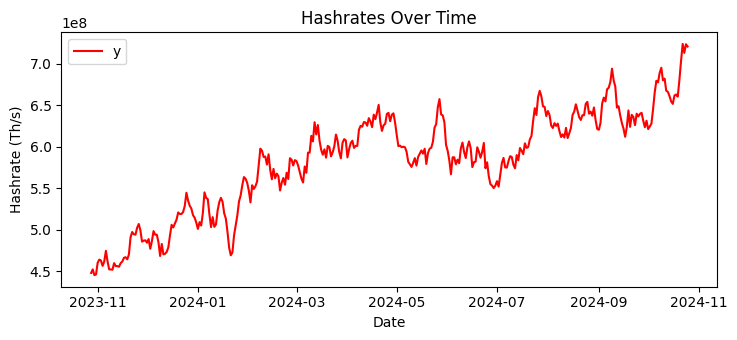

In [466]:
#Daily hasrates to BTC miners across the globe
file_path = hashrate_BTC
json_data = read_and_print_json(file_path)

category_y = 'hash-rate'
category_x = 'Revenue (USD)'
df_hr = process_data(category_y,category_x,json_data)

df_hr = add_dates(df_hr,last_date)

print(df_hr.head())

y_data = 'y'
title = 'Hashrates Over Time'
y_label = 'Hashrate (Th/s)'
plot_graph(df_hr,y_data,title,y_label)

{'metric1': 'market-price', 'metric2': 'market-price', 'market-price': [{'x': 1231545600000, 'y': 0}, {'x': 1231891200000, 'y': 0}, {'x': 1232236800000, 'y': 0}, {'x': 1232582400000, 'y': 0}, {'x': 1232928000000, 'y': 0}, {'x': 1233273600000, 'y': 0}, {'x': 1233619200000, 'y': 0}, {'x': 1233964800000, 'y': 0}, {'x': 1234310400000, 'y': 0}, {'x': 1234656000000, 'y': 0}, {'x': 1235001600000, 'y': 0}, {'x': 1235347200000, 'y': 0}, {'x': 1235692800000, 'y': 0}, {'x': 1236038400000, 'y': 0}, {'x': 1236384000000, 'y': 0}, {'x': 1236729600000, 'y': 0}, {'x': 1237075200000, 'y': 0}, {'x': 1237420800000, 'y': 0}, {'x': 1237766400000, 'y': 0}, {'x': 1238112000000, 'y': 0}, {'x': 1238457600000, 'y': 0}, {'x': 1238803200000, 'y': 0}, {'x': 1239148800000, 'y': 0}, {'x': 1239494400000, 'y': 0}, {'x': 1239840000000, 'y': 0}, {'x': 1240185600000, 'y': 0}, {'x': 1240531200000, 'y': 0}, {'x': 1240876800000, 'y': 0}, {'x': 1241222400000, 'y': 0}, {'x': 1241568000000, 'y': 0}, {'x': 1241913600000, 'y': 0}

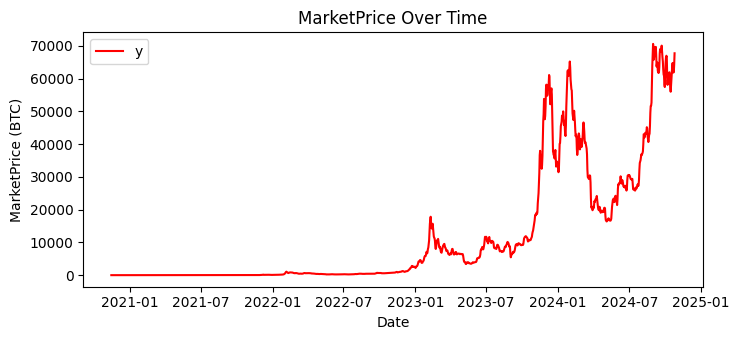

In [467]:
#Daily hasrates to BTC miners across the globe
file_path = marketprice_BTC
json_data = read_and_print_json(file_path)

category_y = 'market-price'
category_x = 'Revenue (USD)'
df_marketprice = process_data(category_y,category_x,json_data)

df_marketprice = add_dates(df_marketprice,last_date)

print(df_marketprice.head())

y_data = 'y'
title = 'MarketPrice Over Time'
y_label = 'MarketPrice (BTC)'
plot_graph(df_marketprice,y_data,title,y_label)

In [468]:
#hash-rate in Th/s
#miners-revenue in USD

df = pd.merge(df_marketprice[['Date', 'market-price']], df_revenue[['Date', 'miners-revenue']], on='Date', how='inner')

df.head()


,Date,market-price,miners-revenue
0,2023-10-28,13226.464286,3.101870e+07
1,2023-10-29,13586.888571,3.186966e+07
2,2023-10-30,14358.632857,3.205324e+07
3,2023-10-31,15188.394286,3.266399e+07
4,2023-11-01,15795.827143,3.344195e+07


In [469]:
df['miners-revenue per BTC_Price'] = df['miners-revenue']/df['market-price']
df = df[['Date','miners-revenue per BTC_Price']]

In [470]:
df.head()

,Date,miners-revenue per BTC_Price
0,2023-10-28,2345.200026
1,2023-10-29,2345.618930
2,2023-10-30,2232.332278
3,2023-10-31,2150.588671
4,2023-11-01,2117.138166


In [471]:
df = pd.merge(df_hr[['Date', 'hash-rate']], df[['Date', 'miners-revenue per BTC_Price']], on='Date', how='inner')

In [472]:
df.head()

,Date,hash-rate,miners-revenue per BTC_Price
0,2023-10-28,4.481432e+08,2345.200026
1,2023-10-29,4.524773e+08,2345.618930
2,2023-10-30,4.455428e+08,2232.332278
3,2023-10-31,4.464321e+08,2150.588671
4,2023-11-01,4.605780e+08,2117.138166


In [473]:
df['miners-revenue per BTC_Price per hashrate'] = df['miners-revenue per BTC_Price']/df['hash-rate']
df = df[['Date','miners-revenue per BTC_Price per hashrate']]

In [474]:
df.head()

,Date,miners-revenue per BTC_Price per hashrate
0,2023-10-28,0.000005
1,2023-10-29,0.000005
2,2023-10-30,0.000005
3,2023-10-31,0.000005
4,2023-11-01,0.000005


In [475]:
#Proposed BTC Values ($ per BTC)

BTC_Value_dict = {
    '10% of Average': df_marketprice['market-price'].mean() * 0.1,
    'Average': df_marketprice['market-price'].mean(),
    '50% of Maximum': df_marketprice['market-price'].max() * 0.5
}

BTC_Value_dict

{'10% of Average': np.float64(1167.0882251832747),
 'Average': np.float64(11670.882251832747),
 '50% of Maximum': np.float64(35280.88714285707)}

In [476]:
df_dict = {key: df.assign(**{key: value}) for key, value in BTC_Value_dict.items()}

In [477]:
df_dict['10% of Average']

,Date,miners-revenue per BTC_Price per hashrate,10% of Average
0,2023-10-28,5.233148e-06,1167.088225
1,2023-10-29,5.183948e-06,1167.088225
2,2023-10-30,5.010366e-06,1167.088225
3,2023-10-31,4.817280e-06,1167.088225
4,2023-11-01,4.596698e-06,1167.088225
...,...,...,...
359,2024-10-21,7.875663e-07,1167.088225
360,2024-10-22,8.011103e-07,1167.088225
361,2024-10-23,8.011439e-07,1167.088225
362,2024-10-24,7.614005e-07,1167.088225


In [478]:

BTC_Values_dfs = {}

# Multiply 'rate' by the BTC value column in each DataFrame in df_dict and store as separate dictionaries
for key, df_sub in df_dict.items():
    # Create a dictionary for each DataFrame with `rate`, BTC value, and product
    BTC_Values_dfs[key] = {
        'Date': df_sub['Date'],
        f'{key}_Revenue_per_Hashrate': df_sub['miners-revenue per BTC_Price per hashrate'] * df_sub[key]
    }

# Convert each nested dictionary to a DataFrame
BTC_Values_dfs = {key: pd.DataFrame(value) for key, value in BTC_Values_dfs.items()}


In [479]:
BTC_Values_dfs

{'10% of Average':           Date  10% of Average_Revenue_per_Hashrate
 0   2023-10-28                             0.006108
 1   2023-10-29                             0.006050
 2   2023-10-30                             0.005848
 3   2023-10-31                             0.005622
 4   2023-11-01                             0.005365
 ..         ...                                  ...
 359 2024-10-21                             0.000919
 360 2024-10-22                             0.000935
 361 2024-10-23                             0.000935
 362 2024-10-24                             0.000889
 363 2024-10-25                             0.000833
 
 [364 rows x 2 columns],
 'Average':           Date  Average_Revenue_per_Hashrate
 0   2023-10-28                      0.061075
 1   2023-10-29                      0.060501
 2   2023-10-30                      0.058475
 3   2023-10-31                      0.056222
 4   2023-11-01                      0.053648
 ..         ...                 

In [480]:
BTC_Values_dfs['10% of Average']

,Date,10% of Average_Revenue_per_Hashrate
0,2023-10-28,0.006108
1,2023-10-29,0.006050
2,2023-10-30,0.005848
3,2023-10-31,0.005622
4,2023-11-01,0.005365
...,...,...
359,2024-10-21,0.000919
360,2024-10-22,0.000935
361,2024-10-23,0.000935
362,2024-10-24,0.000889


In [481]:
dict_Hashrate = dicts["dict_Hashrate(Th/s)"]

In [482]:
for key, df in BTC_Values_dfs.items():
    # Construct the column name based on the current key
    revenue_column_name = f'{key}_Revenue_per_Hashrate'

    for model, hashrate in dict_Hashrate.items():
        # Calculate total revenue for each model
        df[model] = df[revenue_column_name] * hashrate

    # Store the updated DataFrame back into BTC_Values_dfs
    BTC_Values_dfs[key] = df

# Display the updated BTC_Values_dfs to see the results
for key, df in BTC_Values_dfs.items():
    print(f"Updated DataFrame for {key}:\n", df, "\n")

Updated DataFrame for 10% of Average:
           Date  10% of Average_Revenue_per_Hashrate  MicroBT WhatsMiner M63S  \
0   2023-10-28                             0.006108                 2.381943   
1   2023-10-29                             0.006050                 2.359549   
2   2023-10-30                             0.005848                 2.280540   
3   2023-10-31                             0.005622                 2.192655   
4   2023-11-01                             0.005365                 2.092253   
..         ...                                  ...                      ...   
359 2024-10-21                             0.000919                 0.358472   
360 2024-10-22                             0.000935                 0.364637   
361 2024-10-23                             0.000935                 0.364652   
362 2024-10-24                             0.000889                 0.346562   
363 2024-10-25                             0.000833                 0.324847   



In [483]:
BTC_Values_dfs['Average']

,Date,Average_Revenue_per_Hashrate,MicroBT WhatsMiner M63S,Bitmain Antminer S21 Hyd (335Th),MicroBT WhatsMiner M63,MicroBT WhatsMiner M66S,Bitmain Antminer S21 Pro (234Th),Bitmain Antminer S21 (200Th),Bitmain Antminer T21 (190Th),MicroBT WhatsMiner M60S,Canaan Avalon A1566,MicroBT WhatsMiner M60,Bitmain Antminer S19j Pro (104Th),Bitmain Antminer S19 Pro (110Th),Core i7 950,Atom N450,ATI 4850,ATI 5770,The Single,Rig Box
0,2023-10-28,0.061075,23.819429,20.460279,20.399203,18.200487,14.291657,12.215092,11.604337,11.360035,11.298960,10.504979,6.351848,6.718300,1.160434e-06,6.107546e-06,6.168621e-06,0.000013,0.000051,0.003054
1,2023-10-29,0.060501,23.595487,20.267919,20.207417,18.029372,14.157292,12.100250,11.495237,11.253232,11.192731,10.406215,6.292130,6.655137,1.149524e-06,6.050125e-06,6.110626e-06,0.000013,0.000050,0.003025
2,2023-10-30,0.058475,22.805401,19.589255,19.530779,17.425666,13.683241,11.695078,11.110324,10.876422,10.817947,10.057767,6.081440,6.432293,1.111032e-06,5.847539e-06,5.906014e-06,0.000013,0.000049,0.002924
3,2023-10-31,0.056222,21.926546,18.834340,18.778119,16.754130,13.155927,11.244382,10.682163,10.457276,10.401054,9.670169,5.847079,6.184410,1.068216e-06,5.622191e-06,5.678413e-06,0.000012,0.000047,0.002811
4,2023-11-01,0.053648,20.922533,17.971920,17.918272,15.986961,12.553520,10.729504,10.193029,9.978439,9.924791,9.227374,5.579342,5.901227,1.019303e-06,5.364752e-06,5.418400e-06,0.000012,0.000045,0.002682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2024-10-21,0.009192,3.584721,3.079184,3.069992,2.739095,2.150833,1.838319,1.746403,1.709636,1.700445,1.580954,0.955926,1.011075,1.746403e-07,9.191593e-07,9.283509e-07,0.000002,0.000008,0.000460
360,2024-10-22,0.009350,3.646369,3.132137,3.122788,2.786200,2.187821,1.869933,1.776436,1.739037,1.729688,1.608142,0.972365,1.028463,1.776436e-07,9.349664e-07,9.443161e-07,0.000002,0.000008,0.000467
361,2024-10-23,0.009350,3.646522,3.132269,3.122919,2.786317,2.187913,1.870011,1.776511,1.739110,1.729760,1.608210,0.972406,1.028506,1.776511e-07,9.350056e-07,9.443557e-07,0.000002,0.000008,0.000468
362,2024-10-24,0.008886,3.465624,2.976882,2.967996,2.648092,2.079375,1.777243,1.688381,1.652836,1.643950,1.528429,0.924166,0.977484,1.688381e-07,8.886216e-07,8.975078e-07,0.000002,0.000007,0.000444


In [484]:
yearly_revenue_dict = {}

# Calculate the annual revenue for each DataFrame in BTC_Values_dfs
for key, df in BTC_Values_dfs.items():
    # Create a dictionary to hold the sums for this specific key
    model_sums = {model: df[model].sum() for model in dict_Hashrate.keys() if model in df.columns}

    # Convert the model_sums dictionary into a DataFrame for this key
    yearly_revenue_dict[key] = pd.DataFrame(list(model_sums.items()), columns=['Model', 'Annual_Sum'])

# Display the resulting dictionary of DataFrames
for key, df in yearly_revenue_dict.items():
    print(f"Annual Revenue DataFrame for {key}:\n", df, "\n")


Annual Revenue DataFrame for 10% of Average:
                                 Model  Annual_Sum
0             MicroBT WhatsMiner M63S  369.249502
1    Bitmain Antminer S21 Hyd (335Th)  317.175854
2              MicroBT WhatsMiner M63  316.229061
3             MicroBT WhatsMiner M66S  282.144491
4    Bitmain Antminer S21 Pro (234Th)  221.549701
5        Bitmain Antminer S21 (200Th)  189.358719
6        Bitmain Antminer T21 (190Th)  179.890783
7             MicroBT WhatsMiner M60S  176.103609
8                 Canaan Avalon A1566  175.156815
9              MicroBT WhatsMiner M60  162.848498
10  Bitmain Antminer S19j Pro (104Th)   98.466534
11   Bitmain Antminer S19 Pro (110Th)  104.147295
12                        Core i7 950    0.000018
13                          Atom N450    0.000095
14                           ATI 4850    0.000096
15                           ATI 5770    0.000204
16                         The Single    0.000788
17                            Rig Box    0.047340 

An

In [485]:
ASIC_df.head(3)

,Model,Release,Hashrate (Th/s),Power (W),Algorithm,Income ($/day),Electricity Cost ($/day),With Electricity,Without Electricity,Efficiency (j/Gh),Price ($),Noise db,Cooling,Seller,Days to Breakeven,Rig Type,NumberOfRigs,Total Hashrate (Th/s),CapitalCost (000 $)
0,MicroBT WhatsMiner M63S,01-Nov-23,390.0,7215.0,SHA-256,20.29,-20.78,-0.49,20.29,0.019,12449.0,50.0,hydrocooling,AsicMarketPlace,613.553475,ASIC,29568.0,11531520.0,368092.032
1,Bitmain Antminer S21 Hyd (335Th),01-Feb-24,335.0,5360.0,SHA-256,17.43,-15.44,1.99,17.43,0.016,5889.0,50.0,hydrocooling,AsicMarketPlace,337.865749,ASIC,39801.0,13333335.0,234388.089
2,MicroBT WhatsMiner M63,01-Nov-23,334.0,6646.0,SHA-256,17.38,-19.14,-1.76,17.38,0.020,6879.0,50.0,hydrocooling,AsicMarketPlace,395.799770,ASIC,32100.0,10721400.0,220815.900


In [486]:
dict_CapitalCost= dicts['dict_CapitalCost(000)']

In [487]:

for key, df in yearly_revenue_dict.items():
    # Map capital costs from dict_CapitalCost
    df['Capital_Cost ($000)'] = df['Model'].map(dict_CapitalCost)

    # Calculate actual capital cost
    df['Capital_Cost'] = df['Capital_Cost ($000)'] * 1000

    # Calculate the payback period
    df['Payback_Period'] = df['Capital_Cost'] /df['Annual_Sum']

    # Update the DataFrame in yearly_revenue_dict
    yearly_revenue_dict[key] = df

# Display the updated DataFrames with the new calculations
for key, df in yearly_revenue_dict.items():
    print(f"Updated DataFrame for {key}:\n", df, "\n")


Updated DataFrame for 10% of Average:
                                 Model  Annual_Sum  Capital_Cost ($000)  \
0             MicroBT WhatsMiner M63S  369.249502         368092.03200   
1    Bitmain Antminer S21 Hyd (335Th)  317.175854         234388.08900   
2              MicroBT WhatsMiner M63  316.229061         220815.90000   
3             MicroBT WhatsMiner M66S  282.144491         373377.70400   
4    Bitmain Antminer S21 Pro (234Th)  221.549701         303837.09300   
5        Bitmain Antminer S21 (200Th)  189.358719         177217.20600   
6        Bitmain Antminer T21 (190Th)  179.890783         186681.10500   
7             MicroBT WhatsMiner M60S  176.103609         237386.51300   
8                 Canaan Avalon A1566  175.156815         334325.49526   
9              MicroBT WhatsMiner M60  162.848498         207536.51800   
10  Bitmain Antminer S19j Pro (104Th)   98.466534          53541.95000   
11   Bitmain Antminer S19 Pro (110Th)  104.147295          53300.49200   

In [488]:
yearly_revenue_dict['10% of Average']

,Model,Annual_Sum,Capital_Cost ($000),Capital_Cost,Payback_Period
0,MicroBT WhatsMiner M63S,369.249502,368092.03200,3.680920e+08,9.968653e+05
1,Bitmain Antminer S21 Hyd (335Th),317.175854,234388.08900,2.343881e+08,7.389847e+05
2,MicroBT WhatsMiner M63,316.229061,220815.90000,2.208159e+08,6.982783e+05
3,MicroBT WhatsMiner M66S,282.144491,373377.70400,3.733777e+08,1.323356e+06
4,Bitmain Antminer S21 Pro (234Th),221.549701,303837.09300,3.038371e+08,1.371417e+06
5,Bitmain Antminer S21 (200Th),189.358719,177217.20600,1.772172e+08,9.358809e+05
6,Bitmain Antminer T21 (190Th),179.890783,186681.10500,1.866811e+08,1.037747e+06
7,MicroBT WhatsMiner M60S,176.103609,237386.51300,2.373865e+08,1.347993e+06
8,Canaan Avalon A1566,175.156815,334325.49526,3.343255e+08,1.908721e+06
9,MicroBT WhatsMiner M60,162.848498,207536.51800,2.075365e+08,1.274415e+06


In [489]:
for key in yearly_revenue_dict.keys():
    # Merge the release_date into the current DataFrame
    yearly_revenue_dict[key] = yearly_revenue_dict[key].merge(ASIC_df[['Model', 'Release']], on='Model', how='left')

# Display the updated DataFrames with the new release_date column
for key, df in yearly_revenue_dict.items():
    print(f"Updated DataFrame for {key}:\n", df, "\n")

Updated DataFrame for 10% of Average:
                                 Model  Annual_Sum  Capital_Cost ($000)  \
0             MicroBT WhatsMiner M63S  369.249502         368092.03200   
1    Bitmain Antminer S21 Hyd (335Th)  317.175854         234388.08900   
2              MicroBT WhatsMiner M63  316.229061         220815.90000   
3             MicroBT WhatsMiner M66S  282.144491         373377.70400   
4    Bitmain Antminer S21 Pro (234Th)  221.549701         303837.09300   
5        Bitmain Antminer S21 (200Th)  189.358719         177217.20600   
6        Bitmain Antminer T21 (190Th)  179.890783         186681.10500   
7             MicroBT WhatsMiner M60S  176.103609         237386.51300   
8                 Canaan Avalon A1566  175.156815         334325.49526   
9              MicroBT WhatsMiner M60  162.848498         207536.51800   
10  Bitmain Antminer S19j Pro (104Th)   98.466534          53541.95000   
11   Bitmain Antminer S19 Pro (110Th)  104.147295          53300.49200   

In [490]:
# Process each DataFrame in yearly_revenue_dict to find the model with the minimum payback period
for key, df in yearly_revenue_dict.items():
    # Identify the model with the minimum payback period
    min_payback_idx = df['Payback_Period'].idxmin()
    min_payback_row = df.loc[min_payback_idx]

    min_payback_model = min_payback_row['Model']
    min_payback_value = min_payback_row['Payback_Period']
    min_payback_releasedate = min_payback_row['Release']  # Adjusted to match column name

    # Display the model with the minimum payback period and its value
    print(f"Model with minimum payback period for {key}: {min_payback_model}")
    print(f"Release Date of Model with minimum payback period for {key}: {min_payback_releasedate}")
    print(f"Minimum payback period for {key}: {min_payback_value}\n")


Model with minimum payback period for 10% of Average: Bitmain Antminer S19 Pro (110Th)
Release Date of Model with minimum payback period for 10% of Average: 01-May-20
Minimum payback period for 10% of Average: 511779.89586775884

Model with minimum payback period for Average: Bitmain Antminer S19 Pro (110Th)
Release Date of Model with minimum payback period for Average: 01-May-20
Minimum payback period for Average: 51177.98958677589

Model with minimum payback period for 50% of Maximum: Bitmain Antminer S19 Pro (110Th)
Release Date of Model with minimum payback period for 50% of Maximum: 01-May-20
Minimum payback period for 50% of Maximum: 16929.627872855544



C:\Users\HeldaMandlate\AppData\Local\Temp\ipykernel_28968\466260362.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release'] = pd.to_datetime(df['Release'])


<Figure size 1200x800 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


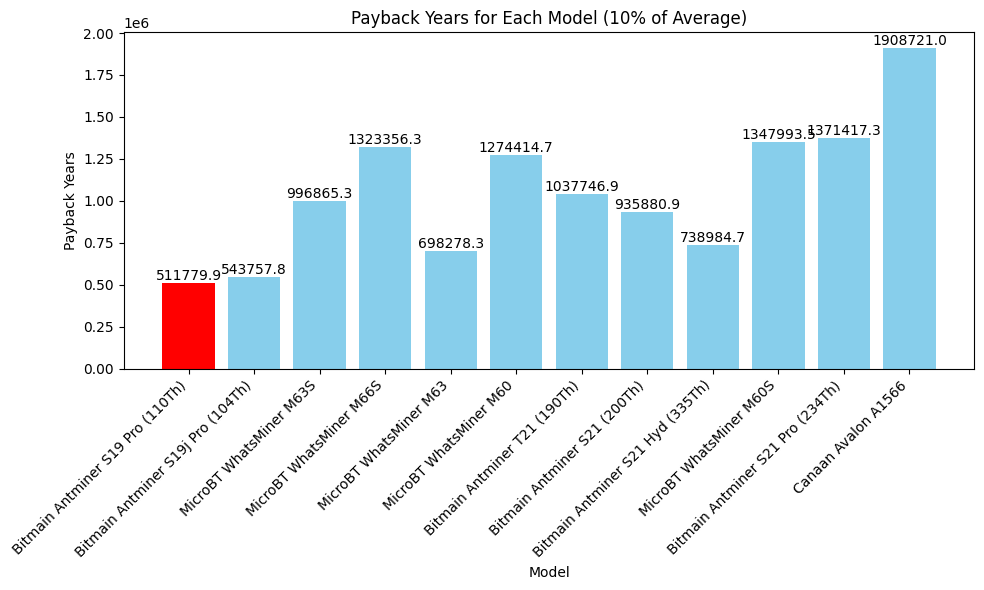

C:\Users\HeldaMandlate\AppData\Local\Temp\ipykernel_28968\466260362.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release'] = pd.to_datetime(df['Release'])
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


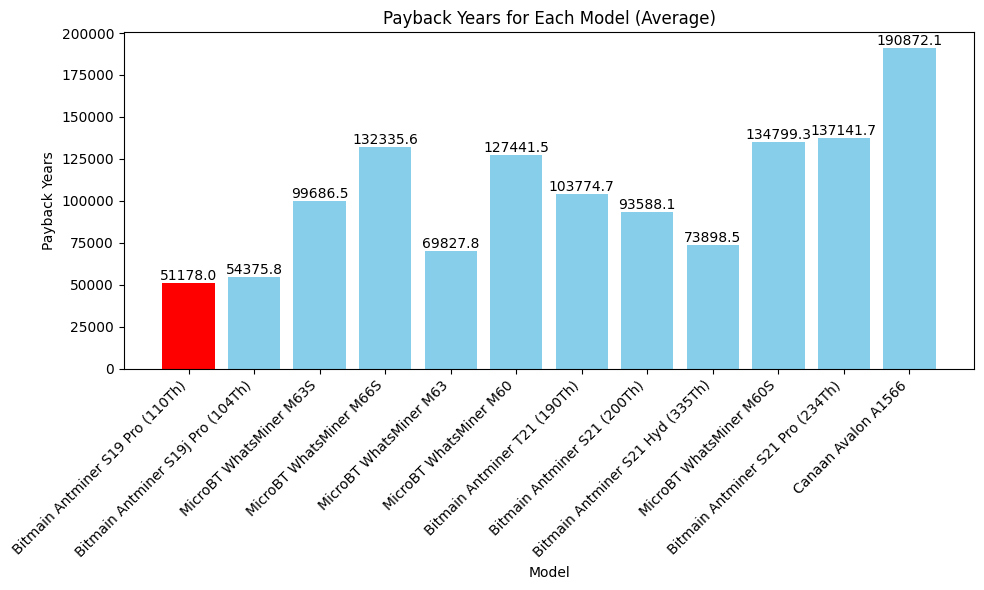

C:\Users\HeldaMandlate\AppData\Local\Temp\ipykernel_28968\466260362.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release'] = pd.to_datetime(df['Release'])
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


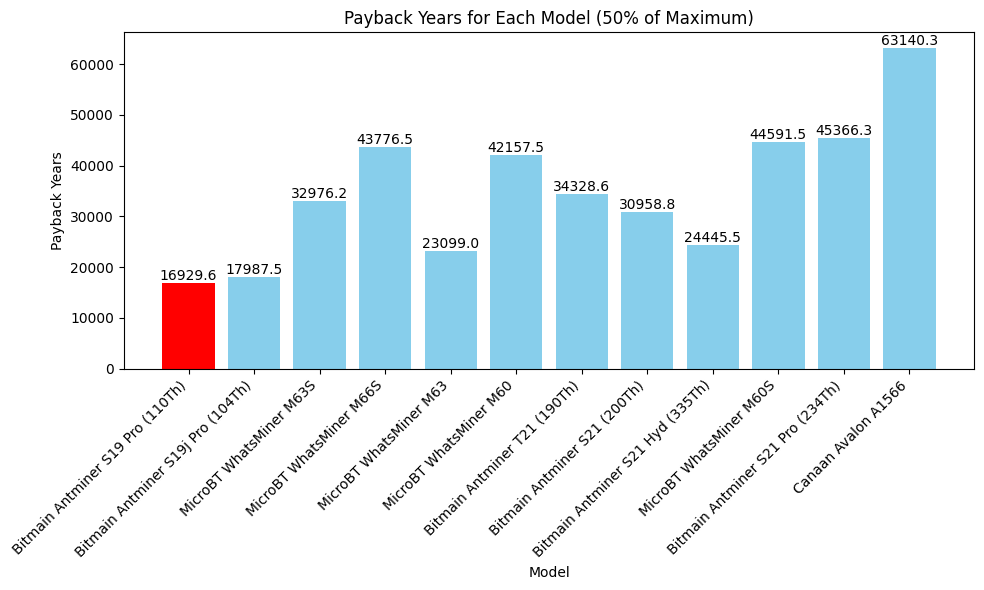

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

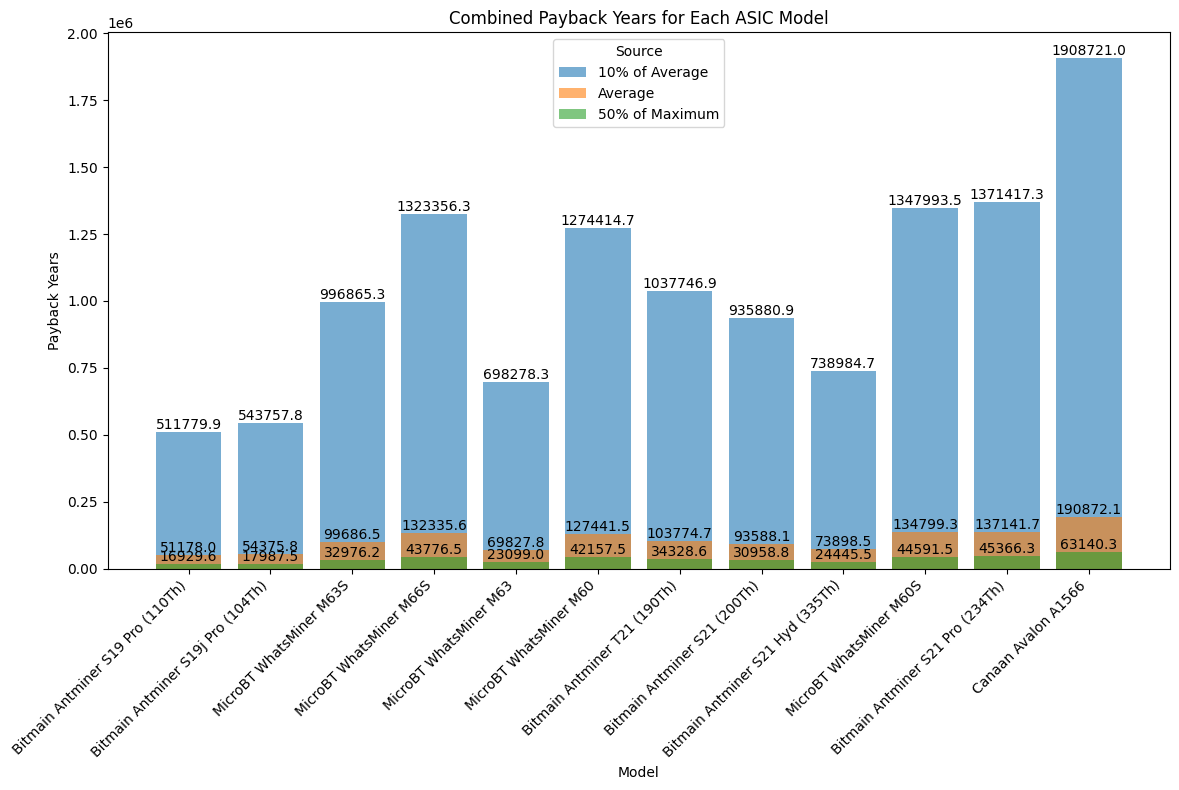

In [491]:
# Set up a figure for the combined plot
plt.figure(figsize=(12, 8))

# Initialize an empty DataFrame for combined models
Combined_Models = pd.DataFrame()

# Process each DataFrame in yearly_revenue_dict
for key, df in yearly_revenue_dict.items():
    # Ensure the 'Release' column is in datetime format if it's not already
    df['Release'] = pd.to_datetime(df['Release'])
    
    # Sort the DataFrame by 'Release'
    df_sorted = df.sort_values(by='Release')

    # Identify the model with the minimum payback period
    min_payback_idx = df_sorted['Payback_Period'].idxmin()

    # Define colors for bars, highlighting the minimum payback period model
    colors = ['red' if i == min_payback_idx else 'skyblue' for i in df_sorted.index]

    # Plot the bar chart with models ordered by Release
    plt.figure(figsize=(10, 6))
    bars = plt.bar(df_sorted['Model'], df_sorted['Payback_Period'], color=colors)

    # Add payback period values on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')  # Round to 1 decimal place

    # Set labels and title for individual plot
    plt.xlabel('Model')
    plt.ylabel('Payback Years')
    plt.title(f'Payback Years for Each Model ({key})')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    # Show individual plot
    plt.show()

    # Combine the models and payback periods for the combined plot
    Combined_Models = pd.concat([Combined_Models, df_sorted[['Model', 'Payback_Period']].assign(Source=key)], ignore_index=True)

# Plot the combined bar chart
plt.figure(figsize=(12, 8))
for source in Combined_Models['Source'].unique():
    subset = Combined_Models[Combined_Models['Source'] == source]
    bars = plt.bar(subset['Model'], subset['Payback_Period'], label=source, alpha=0.6)

    # Add payback period values on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')  # Round to 1 decimal place

# Set labels and title for combined plot
plt.xlabel('Model')
plt.ylabel('Payback Years')
plt.title('Combined Payback Years for Each ASIC Model')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Source')
plt.tight_layout()

# Show combined plot
plt.show()


In [492]:
yearly_revenue_dict =  {key: df.dropna() for key, df in yearly_revenue_dict.items()}


In [493]:
yearly_revenue_dict

{'10% of Average':                                 Model  Annual_Sum  Capital_Cost ($000)  \
 0             MicroBT WhatsMiner M63S  369.249502         368092.03200   
 1    Bitmain Antminer S21 Hyd (335Th)  317.175854         234388.08900   
 2              MicroBT WhatsMiner M63  316.229061         220815.90000   
 3             MicroBT WhatsMiner M66S  282.144491         373377.70400   
 4    Bitmain Antminer S21 Pro (234Th)  221.549701         303837.09300   
 5        Bitmain Antminer S21 (200Th)  189.358719         177217.20600   
 6        Bitmain Antminer T21 (190Th)  179.890783         186681.10500   
 7             MicroBT WhatsMiner M60S  176.103609         237386.51300   
 8                 Canaan Avalon A1566  175.156815         334325.49526   
 9              MicroBT WhatsMiner M60  162.848498         207536.51800   
 10  Bitmain Antminer S19j Pro (104Th)   98.466534          53541.95000   
 11   Bitmain Antminer S19 Pro (110Th)  104.147295          53300.49200   
 
     

<Figure size 1200x800 with 0 Axes>

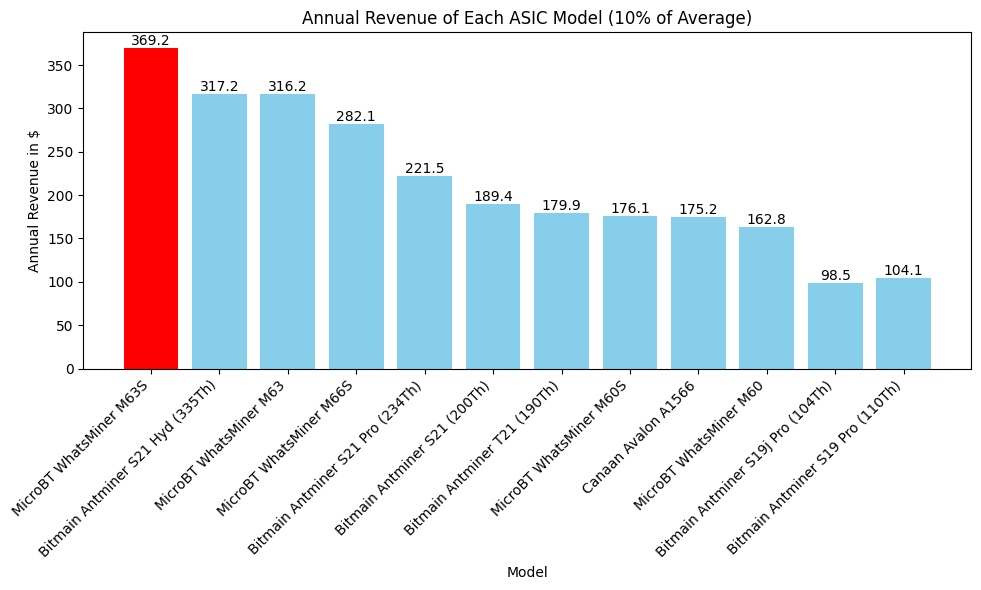

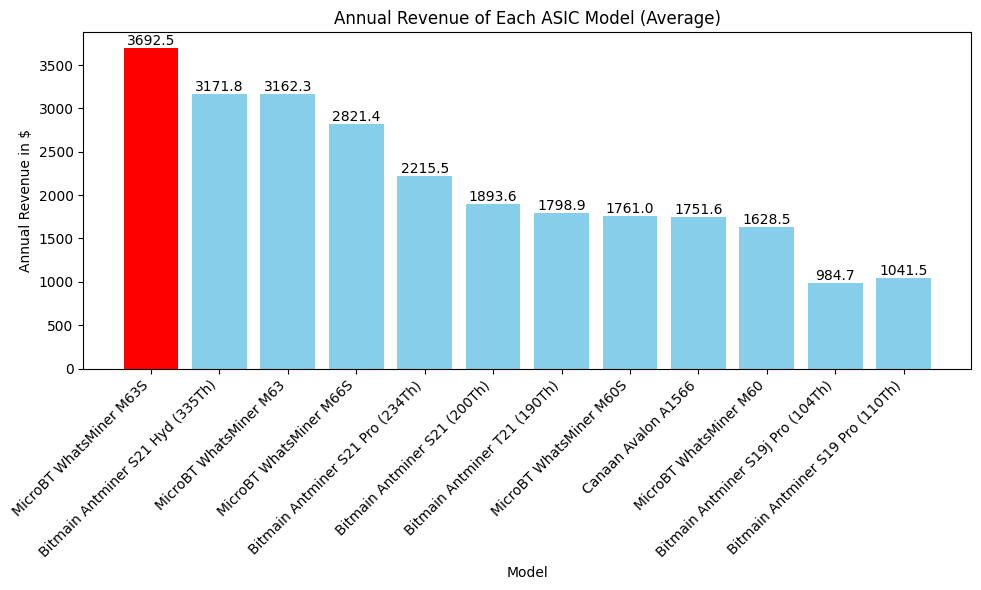

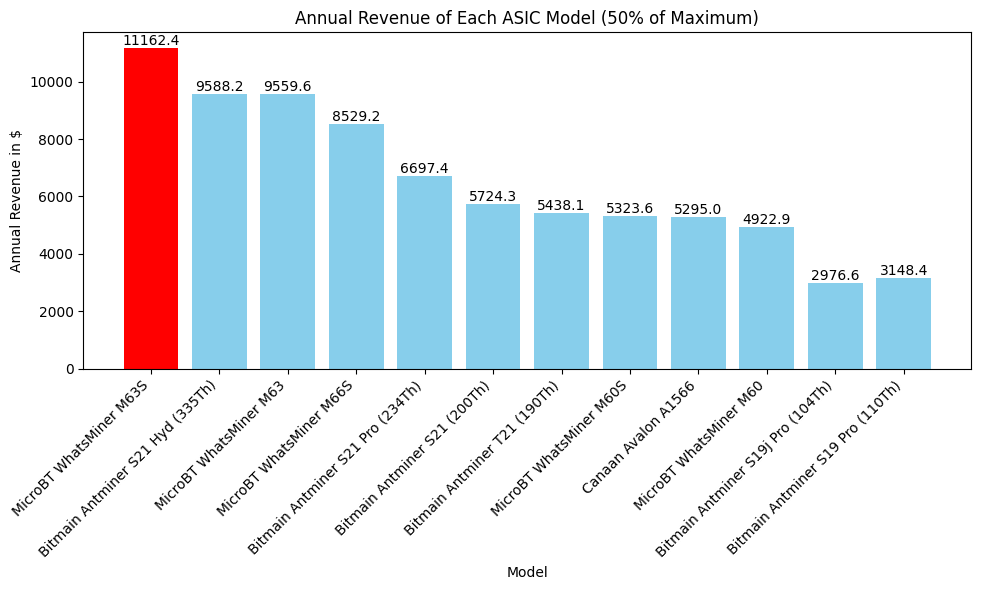

In [494]:
# Assume yearly_revenue_dict contains DataFrames with relevant data
plt.figure(figsize=(12, 8))

# Iterate through each key and DataFrame in yearly_revenue_dict
for key, Yearly_revenue_perModel in yearly_revenue_dict.items():
    # Filter out rows where 'Annual_Sum' is 0
    Yearly_revenue_perModel = Yearly_revenue_perModel[Yearly_revenue_perModel['Annual_Sum'] != 0]

    # Calculate colors for the bar chart
    min_payback_idx = Yearly_revenue_perModel['Annual_Sum'].idxmax()  # Highlight the model with max revenue
    colors = ['red' if i == min_payback_idx else 'skyblue' for i in Yearly_revenue_perModel.index]

    # Plot the bar chart with models ordered by release
    plt.figure(figsize=(10, 6))
    bars = plt.bar(
        Yearly_revenue_perModel['Model'],
        (Yearly_revenue_perModel['Annual_Sum']),  # Convert to $ millions
        color=colors,
    )

    # Set labels and title
    plt.xlabel('Model')
    plt.ylabel('Annual Revenue in $')
    plt.title(f'Annual Revenue of Each ASIC Model ({key})')

    # Add text labels above the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', ha='center', va='bottom')

    # Adjust x-axis labels
    plt.xticks(rotation=45, ha='right')

    # Layout adjustment
    plt.tight_layout()
    plt.show()

